In [30]:
import findspark
findspark.init()
import pyspark
if not 'sc' in globals():
    sc = pyspark.SparkContext(appName="ICP4")
text_file = sc.textFile("input.txt")
text_file

input.txt MapPartitionsRDD[112] at textFile at NativeMethodAccessorImpl.java:0

In [31]:
counts = text_file.flatMap(lambda line: line.split(" ")) \
             .map(lambda word: (word, 1)) \
             .reduceByKey(lambda a, b: a + b)
for x in counts.collect():
    print (x)

('2019', 1)
('ఎన్నికల', 1)
('తర్వాత', 1)
('అధికారంలోకి', 1)
('జగన్', 2)
('స్టీఫెన్', 2)
('రవీంద్రను', 2)
('తీసుకొచ్చేందుకు', 1)
('చీఫ్\u200cగా', 3)
('భావించారట.', 1)
('కేసీఆర్\u200c\u200cతో', 1)
('చర్చించగా..', 1)
('గ్రీన్', 2)
('సిగ్నల్', 2)
('రిలీవ్', 1)
('చేసి..', 1)
('డిప్యుటేషన్\u200cపై', 1)
('చేశారు.', 1)
('రవీంద్ర', 1)
('అమరావతిలో', 1)
('ముఖ్యమంత్రి', 1)
('జగన్\u200cతో', 1)
('సమావేశమయ్యారు.', 1)
('అప్పుడు', 1)
('ఆ', 2)
('విశ్వజిత్\u200cకు', 1)
('అప్పగించారు.', 2)
('విభాగం', 1)
('బాధ్యతల్ని', 1)
('డిసెంబర్\u200cలో', 1)
('పూర్తిస్థాయిలో', 1)
('చీఫ్\u200c\u200cను', 1)
('మనీష్\u200cకుమార్', 1)
('సిన్హాకు', 1)
('స్థానంలో', 1)
('నియమించారు..', 1)
('అధికారి.', 1)
('చూసుకుంటున్నారు.', 1)
('వచ్చిన', 1)
('సర్కార్', 1)
('ఏపీకి', 3)
('ప్రయత్నాలు', 3)
('చేసింది.', 1)
('ఇంటిలిజెన్స్', 4)
('బాధ్యతలు', 3)
('అప్పగించాలని', 1)
('సీఎం', 2)
('తెలంగాణ', 2)
('ఆయన', 1)
('కూడా', 1)
('ఇచ్చారు.', 1)
('నుంచి', 2)
('తీసుకెళ్లే', 1)
('వైఎస్', 1)
('దీంతో', 2)
('రావడం', 1)
('ఖాయమని', 1)
('అందరూ', 1)
('భావించా

In [32]:
from pyspark.sql import SQLContext
from pyspark import SparkFiles
sqlContext = SQLContext(sc)

In [33]:
df = sqlContext.read.csv(SparkFiles.get("/home/srichakradhar/Documents/KDM/ICP4/data.csv"), header=True, inferSchema= True)
df.cache()
df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)



In [34]:
df.show(5, truncate = False)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+-------------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines   |InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract      |PaperlessBilling|PaymentMethod            |MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+-------------------------+--------------+------------+-----+
|7590-VHVEG|Female|0            |Yes    |No        |1     |No          |No phone service|DSL            |No            |Yes         |No              |N

In [35]:
#If you didn't set inferSchema to True, here is what is happening to the type. There are all in string.
#df_string = sqlContext.read.csv(SparkFiles.get("C:/Users/shs6g/Desktop/KDM/code/ICP4_V2/data.csv"), header=True, inferSchema=  False)
#df_string.printSchema()


#You can select and show the rows with select and the names of the features. Below, gender and churn are selected.
df.select('gender','churn').show(5)

+------+-----+
|gender|churn|
+------+-----+
|Female|   No|
|  Male|   No|
|  Male|  Yes|
|  Male|   No|
|Female|  Yes|
+------+-----+
only showing top 5 rows



In [36]:
#To get a summary statistics, of the data, you can use describe(). It will compute the :count, mean, standarddeviation, min, max
df.describe().show()

+-------+----------+------+------------------+-------+----------+------------------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+------------------+------------------+-----+
|summary|customerID|gender|     SeniorCitizen|Partner|Dependents|            tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|    MonthlyCharges|      TotalCharges|Churn|
+-------+----------+------+------------------+-------+----------+------------------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+------------------+------------------+-----+
|  count|      7043|  7043|              7043|   7043|      7043|     

In [37]:
import pandas as pd
# use Pandas instead of the Spark DataFrame.show() function because it creates a prettier print.
pd.DataFrame(df.take(5), columns=df.columns)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
customerID,7043,None,None,0002-ORFBO,9995-HOTOH
gender,7043,None,None,Female,Male
SeniorCitizen,7043,0.1621468124378816,0.3686116056100135,0,1
Partner,7043,None,None,No,Yes
Dependents,7043,None,None,No,Yes
tenure,7043,32.37114865824223,24.559481023094442,0,72
PhoneService,7043,None,None,No,Yes
MultipleLines,7043,None,None,No,Yes
InternetService,7043,None,None,DSL,No


# Correlations and Data Preparation
We can also perform our own statistical analyses, using the MLlib statistics package or other python packages. Here, we're use the Pandas library to examine correlations between the numeric columns by generating scatter plots of them.

For the Pandas workload, we don't want to pull the entire data set into the Spark driver, as that might exhaust the available RAM and throw an out-of-memory exception. Instead, we'll randomly sample a portion of the data (say 10%) to get a rough idea of how it looks.

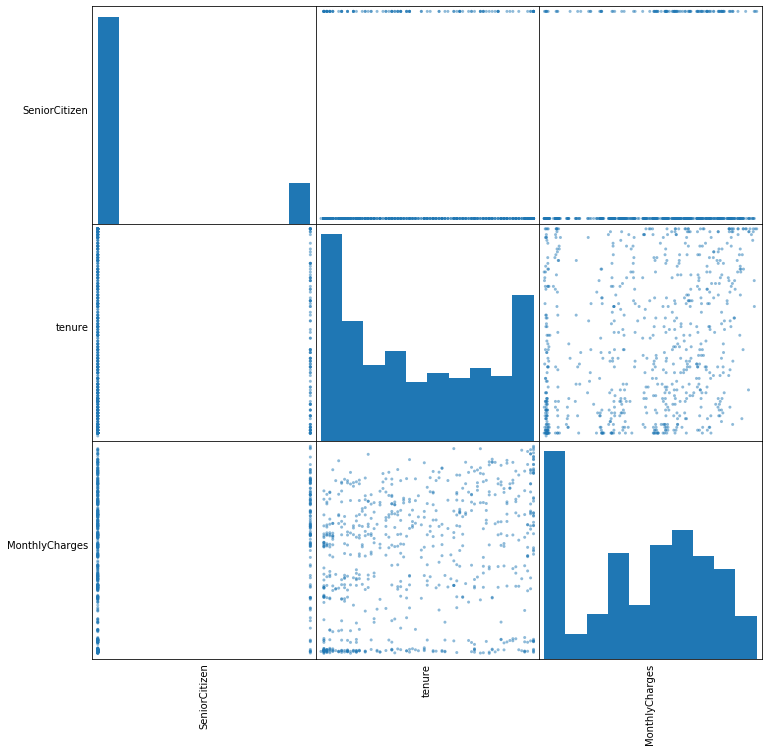

In [39]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int' or t[1] == 'double']

sampled_data = df.select(numeric_features).sample(False, 0.10).toPandas()

axs = pd.plotting.scatter_matrix(sampled_data, figsize=(12, 12));

# Rotate axis labels and remove axis ticks
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

# Transformations

In [40]:
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import UserDefinedFunction

binary_map = {'Yes':1.0, 'No':0.0, 'True':1.0, 'False':0.0}
toNum = UserDefinedFunction(lambda k: binary_map[k], DoubleType())

df = df.drop('customerID')\
    .withColumn('Churn', toNum(df['Churn'])) \
    .withColumn('Partner', toNum(df['Partner'])) \
    .withColumn('Dependents', toNum(df['Dependents'])).cache()

In [66]:
from pyspark.sql.functions import max as sparkMax

maxCharges = df.groupBy(col("Contract")).agg(sparkMax(col("TotalCharges")))
maxCharges

NameError: name 'col' is not defined

In [41]:
pd.DataFrame(df.take(5), columns=df.columns)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1.0,0.0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0
1,Male,0,0.0,0.0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0.0
2,Male,0,0.0,0.0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0
3,Male,0,0.0,0.0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0.0
4,Female,0,0.0,0.0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1.0


# Actions

In [47]:
df.select('InternetService').take(5)

[Row(InternetService='DSL'),
 Row(InternetService='DSL'),
 Row(InternetService='DSL'),
 Row(InternetService='DSL'),
 Row(InternetService='Fiber optic')]

In [49]:
df.select('InternetService').first()

Row(InternetService='DSL')

In [58]:
first_five = df.select('InternetService').take(5)

In [62]:
sc.parallelize(first_five).saveAsTextFile('internet_service.txt')